In [1]:
import numpy as np 
import pandas as pd
from utils.utils import *
from utils.plotting import *
from utils.reco_fit_utils import *

## Notebook for Creating Training Data

**Ensure you have data in root directory before running notebook**

### Instructions for Downloading the Data

**MM_Fit Data**

1. Download the dataset at this [link](https://mmfit.github.io/)
2. Place the folder from the expanded zip in the root directory of the project
3. if data folder called is not `mm-fit` or is not in notebook's root directory then specify the filepath in the cell below

**Crossfit Data**

1. Download the folder `np_exercise_data` from thid google drive: [link](https://drive.google.com/drive/folders/1qnY56rWEQNs1aMeiKvLmOKLlNG1gWzmR)
2. Download `participant_ex_code_map.txt` at this [link](https://drive.google.com/file/d/1loR3a_E92dP465021bcTagTxiwfiSq6l/view)
3. Place the folder from step 1 and txt from step 2 in the root directory of the project
4. If data folder and/or the text file have changed names or is not in notebook's root directory then specify the filepath/name in the cell below


**Reco-fit Data**
1. Download or pull the the file `exercise_data.50.0000_singleonly.mat` from this repository: [link](https://github.com/microsoft/Exercise-Recognition-from-Wearable-Sensors/tree/main)
2. Place that file in the root of the projects directory
3. If name or file path is changed set change `reco_fit_path_name` in the cell below


**Once all data is in correct locations, set the save bool below to determine if you want to save the data and set the save file paths in the cell below, then run the notebook to create and download datasets for the model**

This notebook will take 30+ minutes to run with all data

In [2]:
# save file paths
save_data = True
model_data_path = 'data'


# data file paths
mm_fit_datapath = "mm-fit"
cross_fit_datapath = "np_exercise_data"
cross_fit_participants = "participant_ex_code_map.txt"
reco_fit_path_name = 'exercise_data.50.0000_singleonly.mat'

In [3]:
# load in reco fit Data

processor = MatlabDataProcessor(reco_fit_path_name)
processor.load_file()
df_reco = processor.process_all_data(convert_to_df=True)

df_reco['dataset'] = 'reco'
# data_df.rename(columns = {'subject_id':'user_id', 'activity_name': 'activity_name'}, inplace= True)
df_reco['subject_id'] = df_reco['subject_id'].apply(lambda x: str('reco_'+str(x)))
df_reco = rename_exercises(df_reco)
df_reco['activity_name'] = df_reco['activity_name'].apply(lambda x: x.lower().replace(' ', ''))

df_reco.head()

2025-02-12 21:58:36,805 - INFO - File loaded successfully
2025-02-12 21:58:36,805 - INFO - Loaded 75 activities
2025-02-12 21:58:36,806 - INFO - Processing data matrix of shape (94, 75)
2025-02-12 21:58:40,026 - INFO - Processed 2056 valid instances out of 7050 total cells
2025-02-12 21:58:42,840 - INFO - Created final DataFrame with 7751906 rows


,timestamp,acc_X,acc_Y,acc_Z,gyr_X,gyr_Y,gyr_Z,matrix_row,matrix_col,activity_name,subject_id,activity_reps,start_time,dataset
0,52.399884,-0.678057,-0.525088,0.661963,-236.269299,-84.986143,77.036312,0,37,pushups,reco_3,15,52.398,reco
1,52.419884,-0.761620,-0.486444,0.510914,-60.762158,-80.643264,9.613385,0,37,pushups,reco_3,15,52.398,reco
2,52.439884,-0.830902,0.344620,0.452458,-2.964748,-63.789937,-49.127510,0,37,pushups,reco_3,15,52.398,reco
3,52.459884,-0.765491,0.053850,0.697407,-46.231902,-48.940760,-68.153642,0,37,pushups,reco_3,15,52.398,reco
4,52.479884,-0.737729,-0.335286,0.746702,-26.699921,-8.786237,-78.926749,0,37,pushups,reco_3,15,52.398,reco


In [4]:
# load in mmfit and load crossfit data
mmfit = load_mmfit(filepath=mm_fit_datapath)
crossfit_data = load_crossfit(datapath=cross_fit_datapath, info_path=cross_fit_participants)

mmfit['dataset'] = 'mmfit'
crossfit_data['dataset'] = 'har_data'

  0%|          | 0/21 [00:00<?, ?it/s]/Users/jacobgottesman/Public/DS 4440/smartwatch-activity-recognition/utils/utils.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  raw_data = pd.concat([raw_data, df], axis =0)
  0%|          | 0/11 [00:00<?, ?it/s]/Users/jacobgottesman/Public/DS 4440/smartwatch-activity-recognition/utils/utils.py:81: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp_df], axis = 0)
100%|██████████| 11/11 [00:04<00:00,  2.72it/s]
0it [00:00, ?it/s]
0it

In [5]:
# Merge the 3 datasets
both_df = pd.concat([mmfit, crossfit_data, df_reco], axis=0)
both_df = both_df.reset_index()
both_df.head()
both_df['index'] = range(len(both_df))
both_df.head()

,level_0,index,frame,timestamp,acc_X,acc_Y,acc_Z,gyr_X,gyr_Y,gyr_Z,activity_name,subject_id,dataset,matrix_row,matrix_col,activity_reps,start_time
0,0,0,4050.0,1.562791e+12,9.771680,-0.507744,7.666458,-0.183259,-0.207694,-0.531453,squats,0,mmfit,NaN,NaN,NaN,NaN
1,1,1,4050.0,1.562791e+12,10.008787,-0.356858,8.392149,-0.197920,-0.175929,-0.477696,squats,0,mmfit,NaN,NaN,NaN,NaN
2,2,2,4050.0,1.562791e+12,10.097403,-0.344883,9.022039,-0.111177,-0.146608,-0.422719,squats,0,mmfit,NaN,NaN,NaN,NaN
3,3,3,4051.0,1.562791e+12,10.229129,-0.011975,9.005274,0.008552,-0.108734,-0.362854,squats,0,mmfit,NaN,NaN,NaN,NaN
4,4,4,4051.0,1.562791e+12,11.127261,0.560435,8.715476,0.162490,-0.051313,-0.155160,squats,0,mmfit,NaN,NaN,NaN,NaN


In [6]:
print(f'There are {both_df[['subject_id', 'dataset']].drop_duplicates().shape[0]} unique users.')
print(f'There are {len(both_df['activity_name'].unique())} unique labels.')

There are 172 unique users.
There are 71 unique labels.


In [7]:
both_df.isna().sum()

level_0                0
index                  0
frame            9290512
timestamp        1538606
acc_X                  0
acc_Y                  0
acc_Z                  0
gyr_X                  0
gyr_Y                  0
gyr_Z                  0
activity_name          0
subject_id             0
dataset                0
matrix_row       3102387
matrix_col       3102387
activity_reps    3102387
start_time       3102387
dtype: int64

the columns with null are not columns that we are using

In [8]:
# top 10 activities in all datasets
both_df['activity_name'].value_counts().head(10)

activity_name
deviceontable                   1301735
non-e                           1149916
squats                           686262
walk                             608204
staticstretch                    451196
staticstretch(atyourownpace)     313323
tricepextensions                 295282
running(treadmill)               291569
lunges                           287506
pushups                          285468
Name: count, dtype: int64

In [9]:
both_df.describe()

,level_0,index,frame,timestamp,acc_X,acc_Y,acc_Z,gyr_X,gyr_Y,gyr_Z,matrix_row,matrix_col,activity_reps,start_time
count,1.085429e+07,1.085429e+07,1.563781e+06,9.315687e+06,1.085429e+07,1.085429e+07,1.085429e+07,1.085429e+07,1.085429e+07,1.085429e+07,7.751906e+06,7.751906e+06,7.751906e+06,7.751906e+06
mean,2.774680e+06,5.427146e+06,3.836170e+04,2.632683e+11,-3.455203e-01,-8.180348e-01,6.234996e-01,-1.394277e+00,-4.013605e-01,1.201836e-01,4.489054e+01,3.562815e+01,8.856726e+00,1.161275e+03
std,2.570415e+06,3.133365e+06,2.381080e+04,5.861737e+11,5.204761e+00,3.643644e+00,3.152211e+00,4.843011e+01,6.233445e+01,5.819769e+01,2.855569e+01,2.173188e+01,1.449297e+01,7.168659e+02
min,0.000000e+00,0.000000e+00,8.980000e+02,5.799961e-01,-7.839857e+01,-7.847042e+01,-7.823334e+01,-1.811127e+03,-1.820821e+03,-1.346143e+03,0.000000e+00,1.000000e+00,-1.000000e+00,5.770000e-01
25%,5.852900e+04,2.713573e+06,1.936500e+04,7.144997e+02,-1.006329e+00,-8.887359e-01,-2.183634e-01,-5.669676e+00,-3.578710e+00,-3.184968e+00,1.700000e+01,1.200000e+01,-1.000000e+00,5.156470e+02
50%,2.324759e+06,5.427146e+06,3.611800e+04,1.492634e+03,-4.031501e-01,-2.889998e-01,1.700464e-01,-8.669890e-02,-2.565633e-02,-2.370521e-02,4.600000e+01,3.600000e+01,-1.000000e+00,1.166393e+03
75%,5.038332e+06,8.140719e+06,5.308400e+04,2.298652e+03,4.345653e-01,1.949397e-01,7.957402e-01,2.727230e+00,2.644113e+00,2.964756e+00,7.100000e+01,5.600000e+01,2.000000e+01,1.718402e+03
max,7.751905e+06,1.085429e+07,1.218270e+05,1.596125e+12,7.797012e+01,7.847042e+01,7.843689e+01,1.870256e+03,2.111657e+03,1.378797e+03,9.300000e+01,7.400000e+01,1.000000e+02,3.040662e+03


In [10]:
both_df[both_df['activity_name']=='pushups']['dataset'].unique()

array(['mmfit', 'har_data', 'reco'], dtype=object)

(154126, 17)


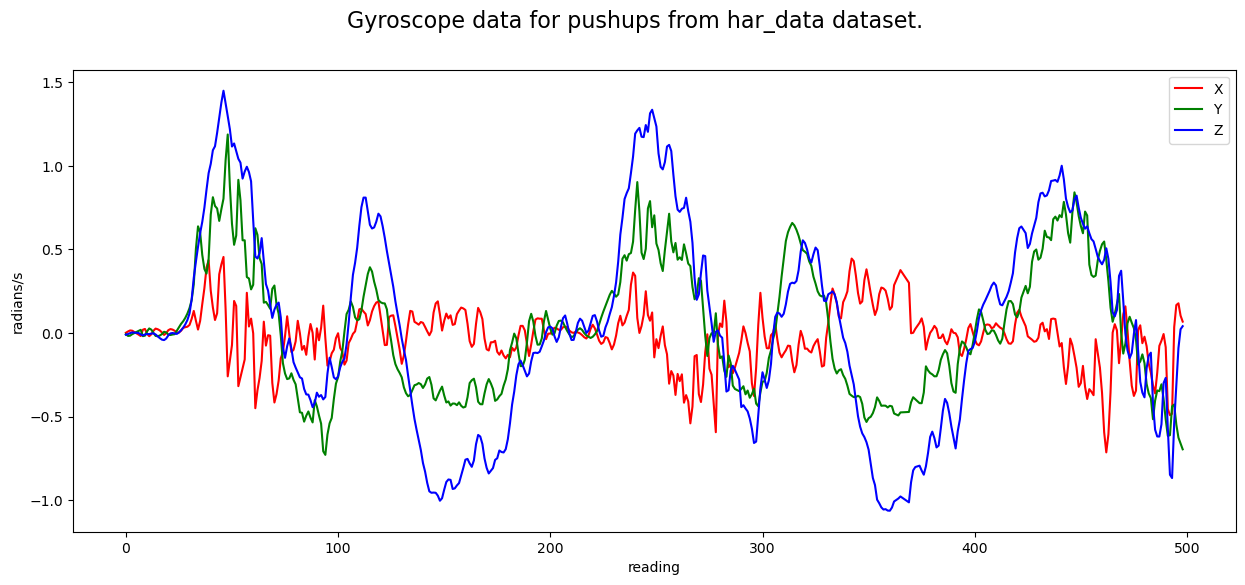

(33943, 17)


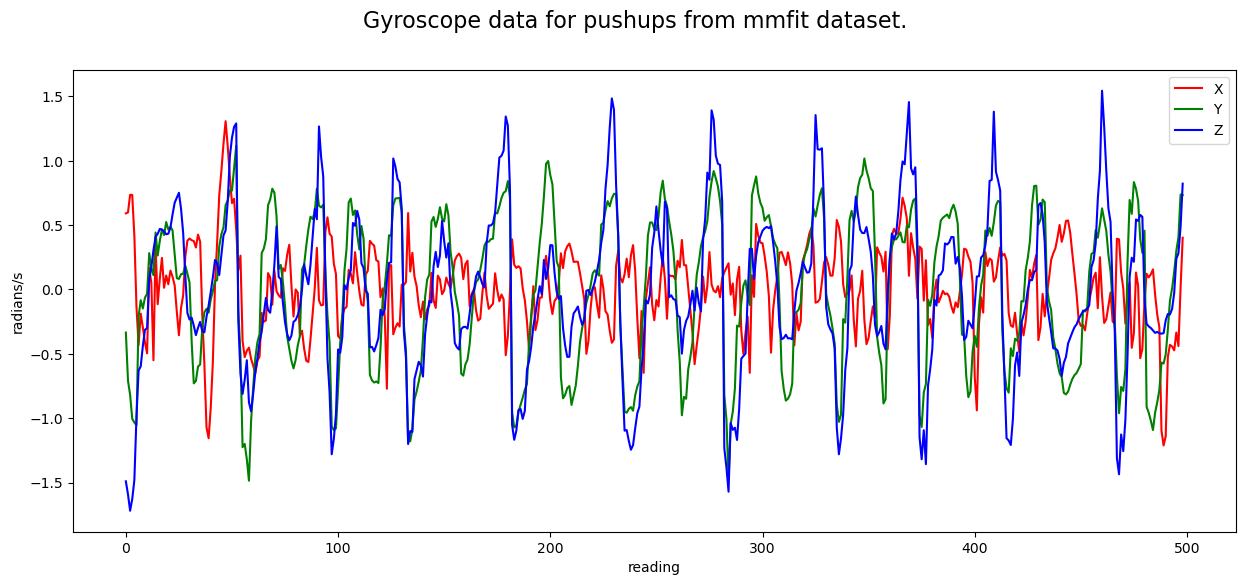

(97399, 17)


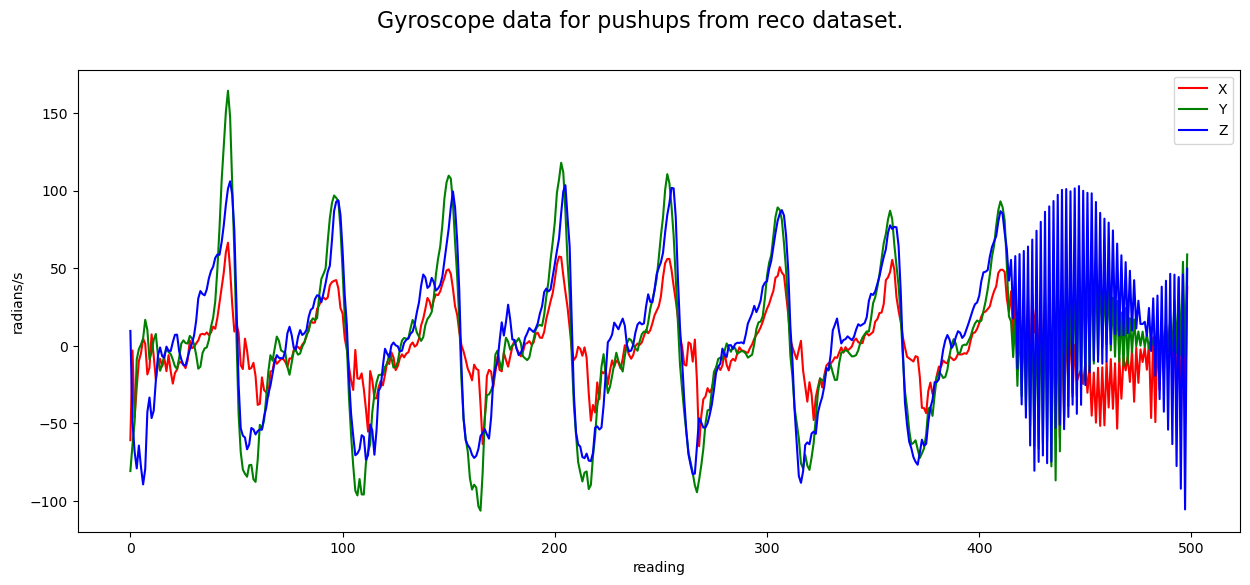

In [12]:
# graph gyropscope data from each dataset of pushes
import matplotlib.pyplot as plt
for dataset in ['har_data', 'mmfit', 'reco']:

    data_df = both_df[both_df['dataset']==dataset]
    print(data_df[data_df['activity_name']=='pushups'].shape)

    plot_sensor_label(data_df, 'gyr', 'pushups', seconds = 5, title = f'Gyroscope data for pushups from {dataset} dataset.')

(154126, 17)


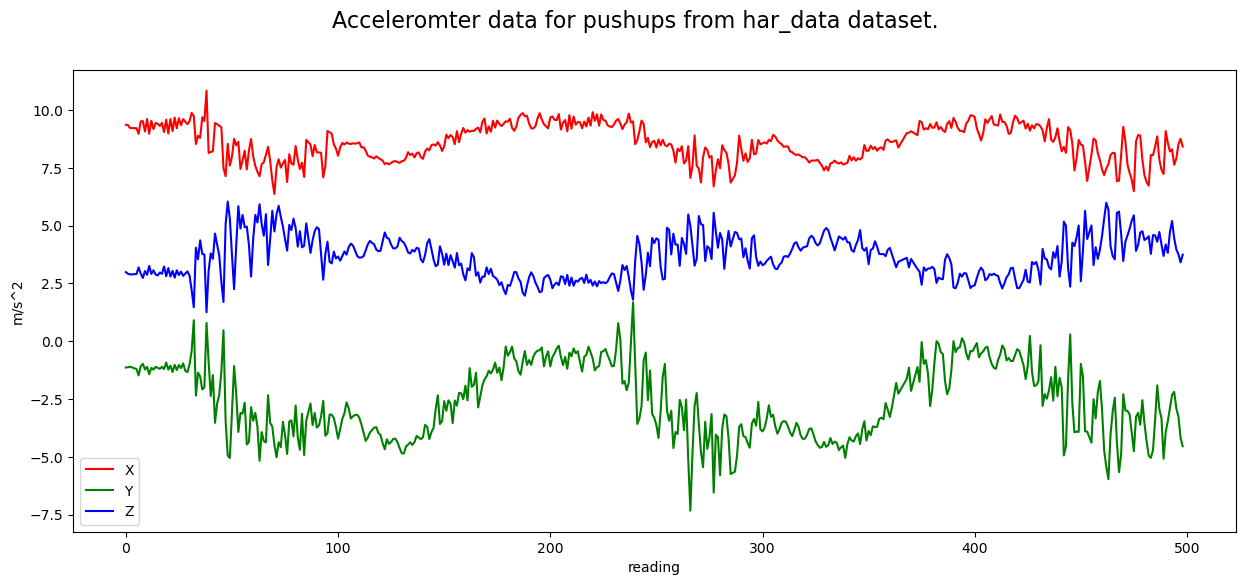

(33943, 17)


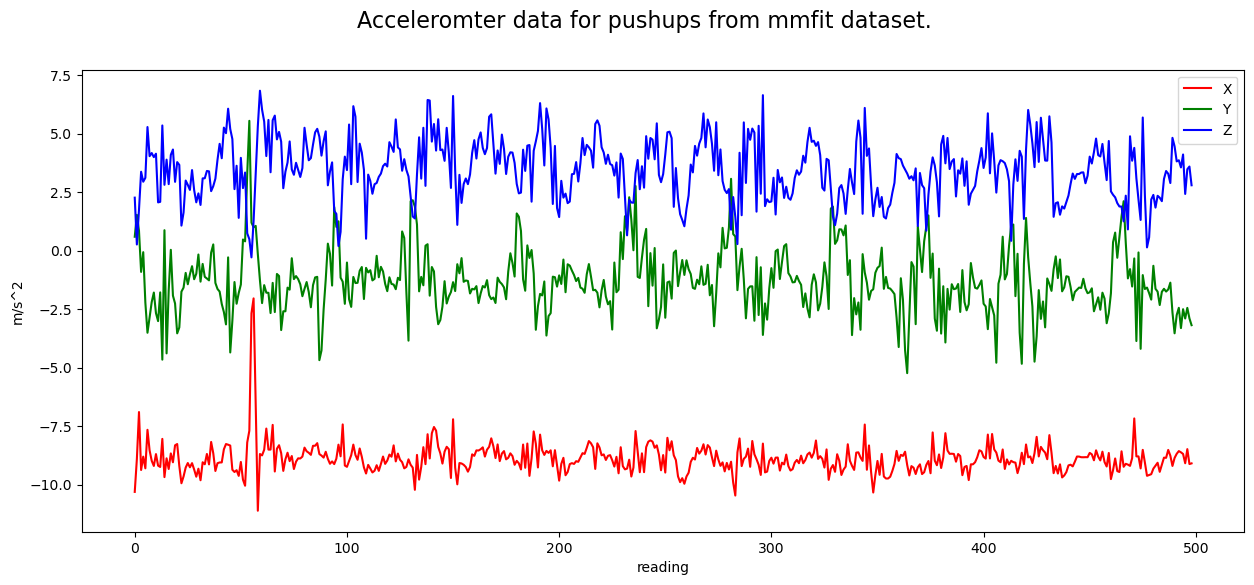

(97399, 17)


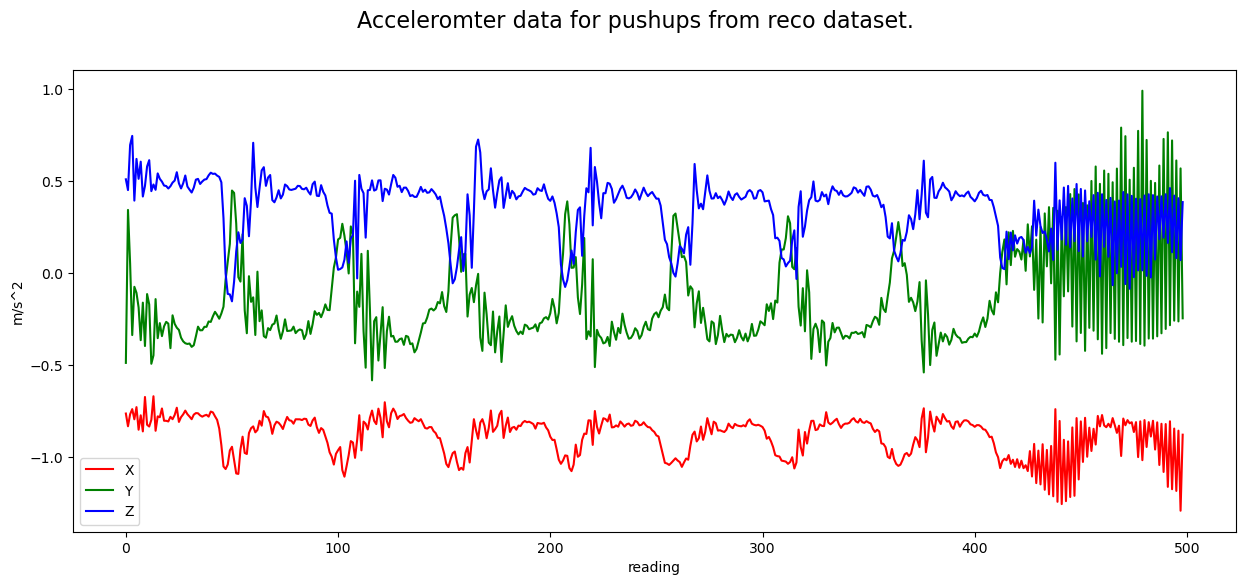

In [14]:
# graph accelerometer data from each dataset of pushes
import matplotlib.pyplot as plt
for dataset in ['har_data', 'mmfit', 'reco']:

    data_df = both_df[both_df['dataset']==dataset]
    print(data_df[data_df['activity_name']=='pushups'].shape)


    plot_sensor_label(data_df, 'acc', 'pushups', seconds = 5, title = f'Acceleromter data for pushups from {dataset} dataset.')

From the above graphs it seems like the the final dataset is being processed differently. This will be dealt with at a later time

In [15]:
# create completely seperate 2 second pieces of data for testing/training
# this creates data in a format that could be used in a CNN

window = 300
spacer = 50
model_data = create_examples(both_df, dim=window, between = spacer)

creating dataset for model


In [16]:
print(f'There are {len(model_data)} rows of data for training/testing')
print('Distribution of classes within data for model')
model_data['activity_name'].value_counts()

There are 164335 rows of data for training/testing
Distribution of classes within data for model


activity_name
deviceontable              22750
non-e                      19858
squats                     10028
walk                        9672
staticstretch               7514
                           ...  
jumping_jacks                128
tapleftdevice                126
note                         122
unlistedexercise              67
alternatingdumbbellcurl       20
Name: count, Length: 67, dtype: int64

In [17]:
model_data.head()

,id,sig_array,activity_name,subject_id,dataset
0,0,"[[-0.1832595, -0.2076941, -0.53145254, 9.77168...",squats,0,mmfit
1,1,"[[1.4453067, -1.6517789, -1.4514153, 1.4441968...",squats,0,mmfit
2,2,"[[1.3023642, -0.0488692, -0.82344604, 8.140672...",squats,0,mmfit
3,3,"[[-0.67683846, 1.067792, 0.6450735, 3.2380664,...",squats,0,mmfit
4,4,"[[0.123394735, 0.28588483, 0.11362089, 12.6337...",squats,0,mmfit


In [19]:
model_data.subject_id.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19,
       'P37', 'P21', 'P23', 'P3', 'P39', 'P7', 'P36', 'P16', 'P26', 'P12',
       'P15', 'P46', 'P49', 'P45', 'P13', 'P27', 'P48', 'P28', 'P18',
       'P14', 'P50', 'P44', 'P29', 'P10', 'P51', 'P11', 'P32', 'P30',
       'P43', 'P17', 'P47', 'P25', 'P4', 'P42', 'P19', 'P35', 'P8', 'P1',
       'P34', 'P9', 'P20', 'P41', 'P5', 'P24', 'P6', 'P2', 'P33', 'P38',
       'P31', 'P40', 'P57', 'P56', 'P54', 'P55', 'P53', 'P58', 'P52',
       'reco_3', 'reco_13', 'reco_15', 'reco_17', 'reco_23', 'reco_28',
       'reco_31', 'reco_62', 'reco_64', 'reco_66', 'reco_67', 'reco_69',
       'reco_71', 'reco_72', 'reco_73', 'reco_74', 'reco_75', 'reco_76',
       'reco_77', 'reco_80', 'reco_81', 'reco_82', 'reco_83', 'reco_84',
       'reco_201', 'reco_203', 'reco_216', 'reco_218', 'reco_223',
       'reco_224', 'reco_228', 'reco_229', 'reco_230', 'reco_231',
       'reco_232', 'reco_233', 'reco_235', 'reco_236', 'reco_238',
   

In [20]:
if save_data:
    model_data.to_csv(f'{model_data_path}/model_data_window_{window}_space_{spacer}.csv')
